In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [34]:
def get_file_list(base_path='/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'):
    files= []
    # Get the list of files in the directory
    for file in os.listdir(base_path):
        # Check if the file ends with .csv
        if file.endswith(".dat"):
            files.append(file)
    files.remove("morpho_S.Or.l._left.dat")
    files.remove("morpho_F.C.M.r.AMS.ant._left.dat")
    files.remove("morpho_S.Or.l._right.dat")
    files.remove("morpho_F.C.M.r.AMS.ant._right.dat")

    return files

def get_sulci_list(base_path='/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'):
    files = get_file_list(base_path)
    sulci_list = [x.split('.dat')[0].split('morpho_')[1] for x in files]

    return sulci_list

In [35]:
print(get_sulci_list('/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'))

['F.Cal.ant.-Sc.Cal._left', 'F.I.P.r.int.1_right', 'F.C.L.r.diag._right', 'S.F.inf._right', 'F.I.P.r.int.1_left', 'S.Pe.C.marginal._left', 'F.C.L.r.retroC.tr._left', 'F.C.L.r.sc.post._left', 'S.T.i.post._left', 'F.C.L.r.asc._left', 'F.C.L.r.sc.ant._right', 'S.F.sup._left', 'S.F.marginal._left', 'F.C.L.a._right', 'S.O.T.lat.ant._right', 'F.P.O._left', 'S.Call._left', 'S.F.orbitaire._right', 'S.R.sup._left', 'F.Coll._right', 'ventricle_left', 'S.T.s.ter.asc.ant._right', 'S.Pe.C.inter._left', 'F.I.P.Po.C.inf._right', 'S.O.T.lat.ant._left', 'S.C._left', 'F.C.L.a._left', 'S.C.LPC._left', 'S.Pe.C.marginal._right', 'S.Olf._left', 'S.R.inf._right', 'S.Li._right', 'F.C.L.r.retroC.tr._right', 'S.F.int._right', 'F.Cal.ant.-Sc.Cal._right', 'S.Po.C.sup._left', 'S.p.C._right', 'S.Pe.C.median._right', 'INSULA_right', 'S.Pe.C.median._left', 'S.T.s.ter.asc.post._right', 'S.Pa.sup._right', 'F.C.L.r.asc._right', 'S.Li._left', 'S.Or._left', 'S.F.median._left', 'S.F.median._right', 'S.T.pol._right', 'S.Po.

In [36]:
print(get_sulci_list('/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach'))

['F.Cal.ant.-Sc.Cal._left', 'F.I.P.r.int.1_right', 'F.C.L.r.diag._right', 'S.F.inf._right', 'F.I.P.r.int.1_left', 'S.Pe.C.marginal._left', 'F.C.L.r.retroC.tr._left', 'F.C.L.r.sc.post._left', 'S.T.i.post._left', 'F.C.L.r.asc._left', 'F.C.L.r.sc.ant._right', 'S.F.sup._left', 'S.F.marginal._left', 'F.C.L.a._right', 'S.O.T.lat.ant._right', 'F.P.O._left', 'S.Call._left', 'S.F.orbitaire._right', 'S.R.sup._left', 'F.Coll._right', 'ventricle_left', 'S.T.s.ter.asc.ant._right', 'S.Pe.C.inter._left', 'F.I.P.Po.C.inf._right', 'S.O.T.lat.ant._left', 'S.C._left', 'F.C.L.a._left', 'S.C.LPC._left', 'S.Pe.C.marginal._right', 'S.Olf._left', 'S.R.inf._right', 'S.Li._right', 'F.C.L.r.retroC.tr._right', 'S.F.int._right', 'F.Cal.ant.-Sc.Cal._right', 'S.Po.C.sup._left', 'S.p.C._right', 'S.Pe.C.median._right', 'INSULA_right', 'S.Pe.C.median._left', 'S.T.s.ter.asc.post._right', 'S.Pa.sup._right', 'F.C.L.r.asc._right', 'S.Li._left', 'S.Or._left', 'S.F.median._left', 'S.F.median._right', 'S.T.pol._right', 'S.Po.

In [40]:
def get_gravity_center_coordinates(base_path , sulci):

    
    # Read the sulci tsv
    file_path = os.path.join(base_path, sulci)
    # Get the coordinates of the gravity center

    sulci_df = pd.read_csv(file_path, sep='\s+').loc[:,["valid","gravityCenter_x", "gravityCenter_y", "gravityCenter_z","surface"]]

    # Filter the dataframe to keep only the valid sulci
    sulci_df = sulci_df[sulci_df['valid'] == 1]

    return sulci_df

In [41]:
#sulci = "morpho_S.Or._left.dat"
sulci= "morpho_S.Pe.C.marginal._left.dat"

df_test = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach", sulci=sulci)

print(df_test.columns)



Index(['valid', 'gravityCenter_x', 'gravityCenter_y', 'gravityCenter_z',
       'surface'],
      dtype='object')


In [42]:
sulci = "morpho_S.Or._left.dat"

df_test = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci)

print(df_test.shape)


(62, 5)


In [43]:
def get_fused_gravity_center(df1, df2):
    """
    Calculate the fused gravity center of two sulci dataframes.
    The fusion is done by weighting the gravity centers by their respective areas.
    """
    total_area = df1["surface"] + df2["surface"]
    
    fused_x = (df1["gravityCenter_x"] * df1["surface"] + df2["gravityCenter_x"] * df2["surface"]) / total_area
    fused_y = (df1["gravityCenter_y"] * df1["surface"] + df2["gravityCenter_y"] * df2["surface"]) / total_area
    fused_z = (df1["gravityCenter_z"] * df1["surface"] + df2["gravityCenter_z"] * df2["surface"]) / total_area

    return pd.DataFrame({"gravityCenter_x": fused_x,
                      "gravityCenter_y": fused_y,
                      "gravityCenter_z": fused_z})


In [44]:
# Example usage of get_fused_gravity_center
sulci1 = "morpho_S.R.sup._left.dat"
sulci2 = "morpho_S.F.inf._left.dat"
df1 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci1)
df2 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci2)
fused_df = get_fused_gravity_center(df1, df2)
print(fused_df)

    gravityCenter_x  gravityCenter_y  gravityCenter_z
0         34.337927       -39.263136       -14.084282
1         33.512887       -37.941216       -17.290984
2         40.051411       -35.148159       -15.912214
3         37.586690       -34.188991       -18.761072
4         33.368039       -38.509292       -12.153984
..              ...              ...              ...
57        31.027253       -35.152353       -19.003360
58        34.935247       -36.022849       -19.252012
59        37.075381       -37.521434       -16.770276
60        35.219176       -42.872777       -15.975858
61        32.793340       -42.840815       -15.899363

[62 rows x 3 columns]


In [18]:
def compute_gravity_center_coordinates_shift(sulci, adult=True):

    """
    Compute the shift of the gravity center coordinates between babies and adults for a given sulcus
    """

    # Get the coordinates of the gravity center for babies
    base_path_babies = "/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach"
    df_babies = get_gravity_center_coordinates(base_path_babies, sulci)

    # Get the coordinates of the gravity center for adults
    base_path_adults = "/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach"
    df_adults = get_gravity_center_coordinates(base_path_adults, sulci)


    # Recalibrate the gravity center for the SR_sup sulcus and the F_inf sulcus in the case of adults

    if adult and (sulci in ["morpho_S.F.inf._left.dat","morpho_S.F.inf._left.dat"]):
        
        # Create a matching for the sulci to be paired
        pair_sulci = {
            "morpho_S.F.inf._left.dat": "morpho_S.R.sup._left.dat",
            "morpho_S.F.inf._right.dat": "morpho_S.R.sup._right.dat",
        }
        df1 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci)
        df2 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=pair_sulci[sulci])
        fused_df = get_fused_gravity_center(df1, df2)
        # Replace the gravity center coordinates in the adults dataframe
        df_adults["gravityCenter_x"] = fused_df["gravityCenter_x"]
        df_adults["gravityCenter_y"] = fused_df["gravityCenter_y"]
        df_adults["gravityCenter_z"] = fused_df["gravityCenter_z"]
        

    # Create a dataframe with the coordinates shift and the distance between the two gravity centers

    mean_babies = df_babies.mean()
    mean_adults = df_adults.mean()

    shift_x = -mean_adults["gravityCenter_x"] + mean_babies["gravityCenter_x"]
    shift_y = -mean_adults["gravityCenter_y"] + mean_babies["gravityCenter_y"]
    shift_z = -mean_adults["gravityCenter_z"] + mean_babies["gravityCenter_z"]
    distance = (shift_x**2 + shift_y**2 + shift_z**2)**0.5

    std_babies = df_babies.std()
    std_adults = df_adults.std()

    

    sulcus_name = sulci.split('.dat')[0].split('morpho_')[1]

    df_shift_sulcus= pd.DataFrame([{
        "sulcus": sulcus_name,
        "shift_x": shift_x,
        "shift_y": shift_y,
        "shift_z": shift_z,
        "distance": distance,
        "nbr_adults": df_adults.shape[0],
        "nbr_babies": df_babies.shape[0],
        "std_babies_x": std_babies["gravityCenter_x"],
        "std_babies_y": std_babies["gravityCenter_y"],
        "std_babies_z": std_babies["gravityCenter_z"],
        "std_adults_x": std_adults["gravityCenter_x"],
        "std_adults_y": std_adults["gravityCenter_y"],
        "std_adults_z": std_adults["gravityCenter_z"],

    }])


    return df_shift_sulcus
     


In [20]:
# Test the function
sulci = "morpho_S.Or._left.dat"
df_test = compute_gravity_center_coordinates_shift(sulci)
print(df_test.head())

       sulcus   shift_x   shift_y   shift_z  distance
0  S.Or._left  3.088506  4.715864  3.819879  6.809531


/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sulci_df = pd.read_csv(file_path, delim_whitespace=True).loc[:,["gravityCenter_x", "gravityCenter_y", "gravityCenter_z"]]
/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sulci_df = pd.read_csv(file_path, delim_whitespace=True).loc[:,["gravityCenter_x", "gravityCenter_y", "gravityCenter_z"]]


In [22]:
def compute_all_gravity_center_shifts():

    # Base paths
    base_path_babies = "/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach"
    base_path_adults = "/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach"

    # Get all the .dat files
    sulci_files = get_file_list(base_path_babies)
    sulci_files. remove("morpho_SR.sup._left.dat")
    sulci_files.remove("morpho_SR.sup._right.dat")

    # Create an empty list
    all_shifts = []

    for sulcus_file in sulci_files:
        df_shift = compute_gravity_center_coordinates_shift(sulcus_file)
        if df_shift is not None:
            all_shifts.append(df_shift)

    df_all_shifts = pd.concat(all_shifts, ignore_index=True)

    # Save the dataframe to a csv file
    df_all_shifts.to_csv("all_sulci_gravity_center_shifts.csv", index=False)

    # Stats on the distance
    df_summary = df_all_shifts.groupby("sulcus")["distance"].mean().sort_values(ascending=False)
    print(df_summary.head(10))



In [23]:
compute_all_gravity_center_shifts()

/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sulci_df = pd.read_csv(file_path, delim_whitespace=True).loc[:,["gravityCenter_x", "gravityCenter_y", "gravityCenter_z"]]
/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sulci_df = pd.read_csv(file_path, delim_whitespace=True).loc[:,["gravityCenter_x", "gravityCenter_y", "gravityCenter_z"]]
/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sulci_df = pd.read_csv(file_path, delim_whitespace=True).loc[:,["gravityCenter_x", "gravityCenter_y", "gravityCenter_z"]]
/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyw

sulcus
S.R.sup._right           51.041314
S.R.sup._left            49.085198
S.O.p._left              27.140924
ventricle_left           26.007206
ventricle_right          25.979573
S.C.LPC._right           21.695029
S.Pe.C.marginal._left    20.644260
S.O.p._right             18.282879
S.F.int._right           15.456012
F.I.P.r.int.1_right      15.238315
Name: distance, dtype: float64


/tmp/ipykernel_1461512/1177162784.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sulci_df = pd.read_csv(file_path, delim_whitespace=True).loc[:,["gravityCenter_x", "gravityCenter_y", "gravityCenter_z"]]


/tmp/ipykernel_1461512/2424500054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_all_shifts_sorted, x="distance", y="sulcus", palette="viridis")


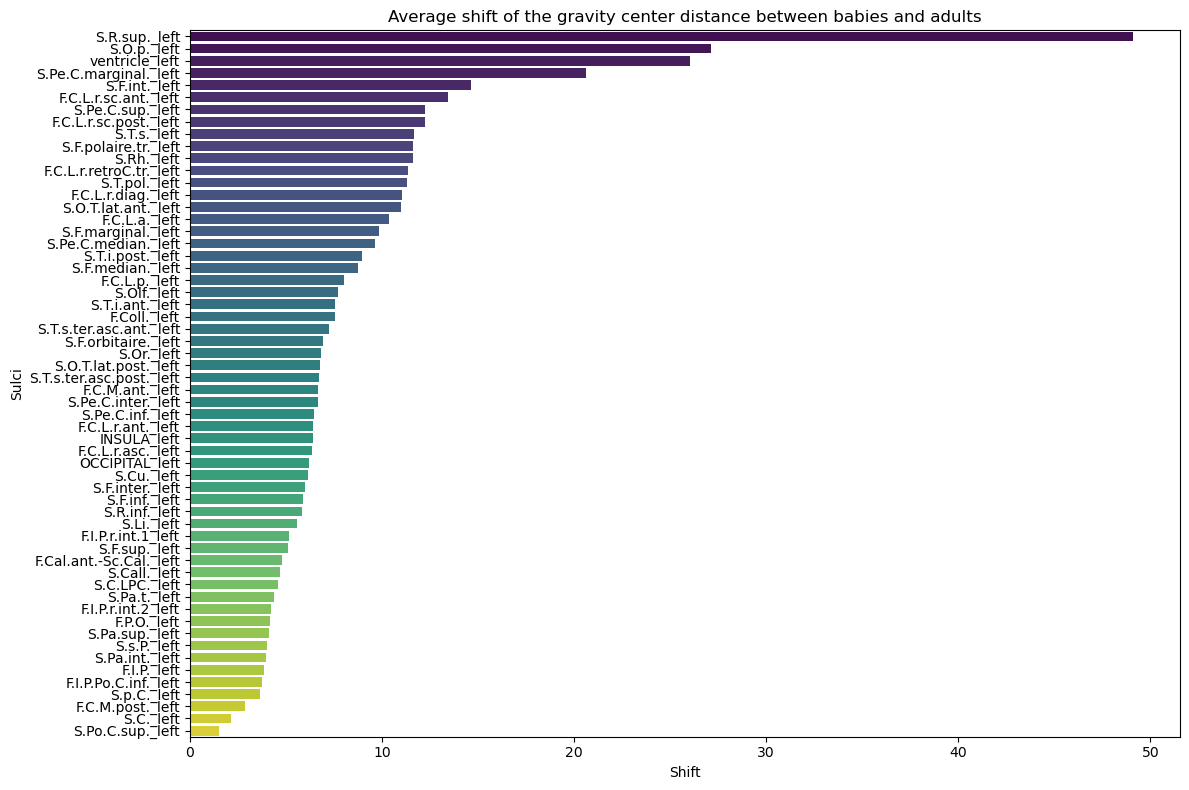

In [26]:
import seaborn as sns
# Sort the dataframe by distance
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/sulci_gravity_center_shifts.csv").sort_values(by="distance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_all_shifts_sorted, x="distance", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity center distance between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1461512/1467855781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_all_shifts_sorted, x="shift_x", y="sulcus", palette="viridis")


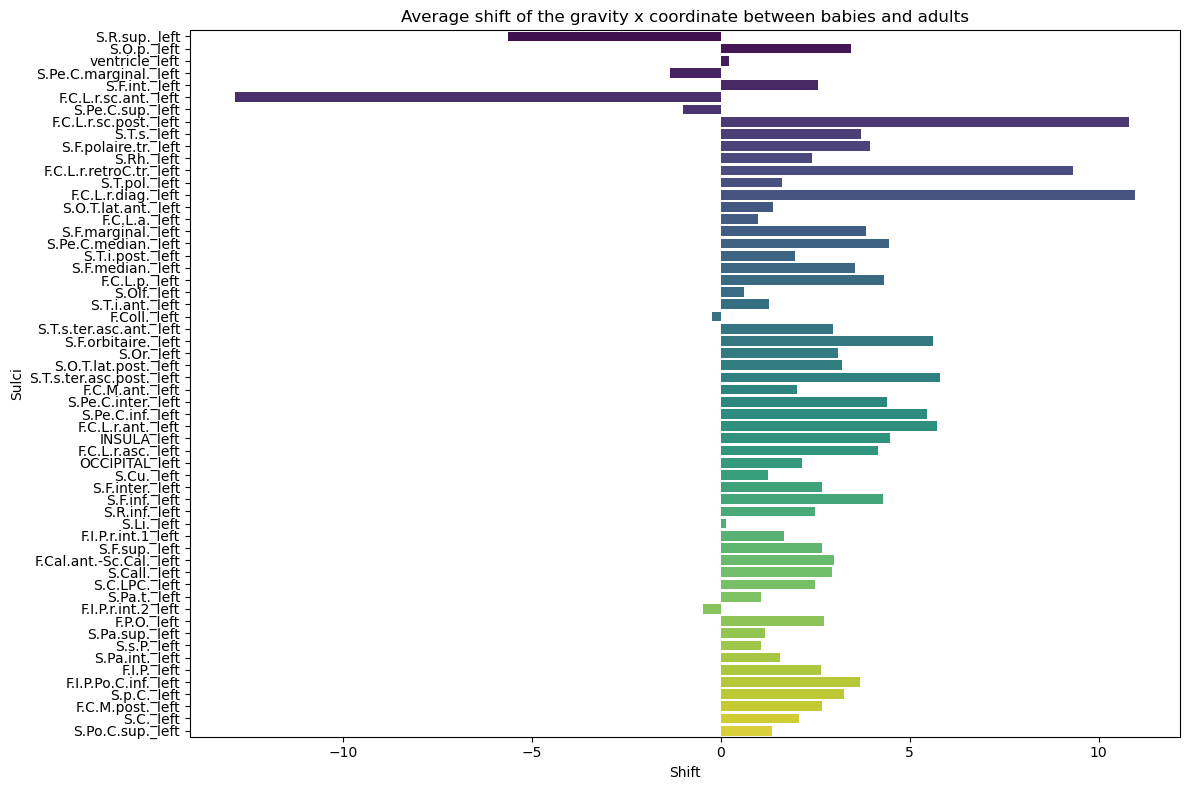

In [28]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/sulci_gravity_center_shifts.csv").sort_values(by="distance", ascending=False)
# change sign of the shift_x
df_all_shifts_sorted["shift_x"] = -df_all_shifts_sorted["shift_x"]


plt.figure(figsize=(12, 8))
sns.barplot(data=df_all_shifts_sorted, x="shift_x", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity x coordinate between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1461512/48768194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_all_shifts_sorted, x="shift_y", y="sulcus", palette="viridis")


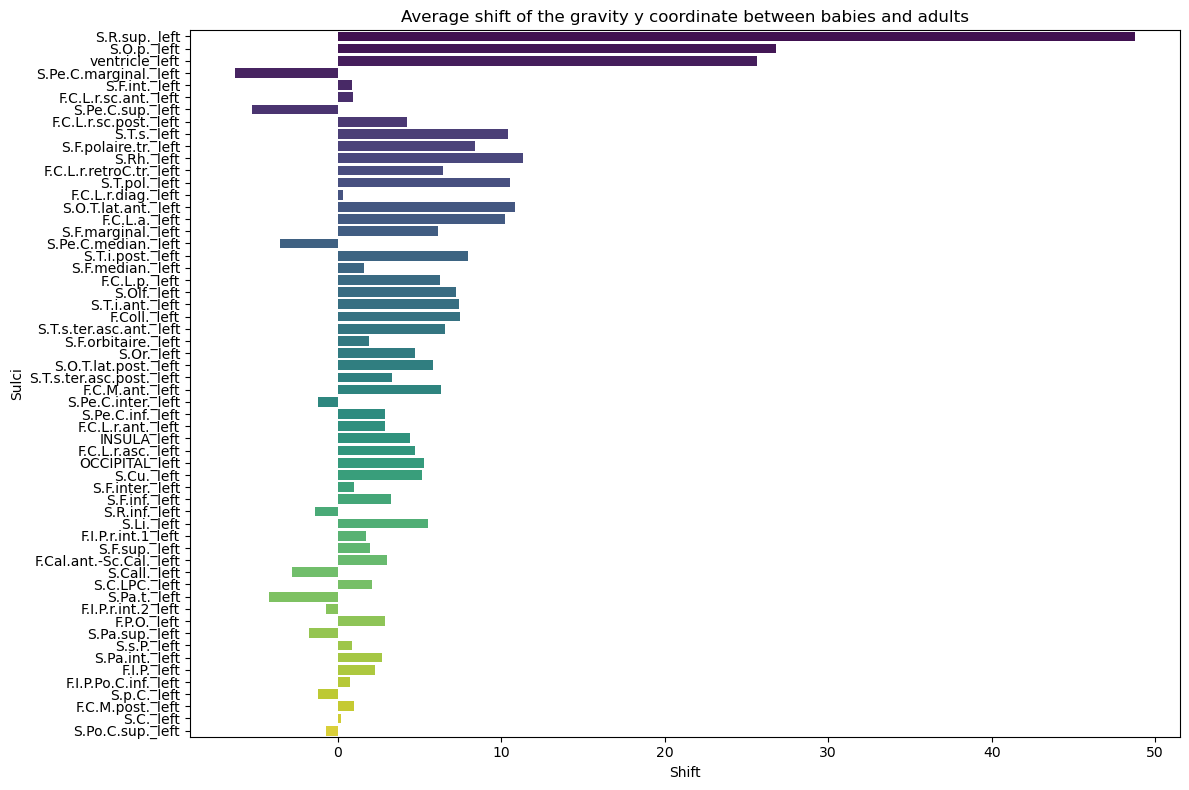

In [29]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/sulci_gravity_center_shifts.csv").sort_values(by="distance", ascending=False)
df_all_shifts_sorted["shift_y"] = -df_all_shifts_sorted["shift_y"]


plt.figure(figsize=(12, 8))
sns.barplot(data=df_all_shifts_sorted, x="shift_y", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity y coordinate between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1461512/4021094914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_all_shifts_sorted, x="shift_z", y="sulcus", palette="viridis")


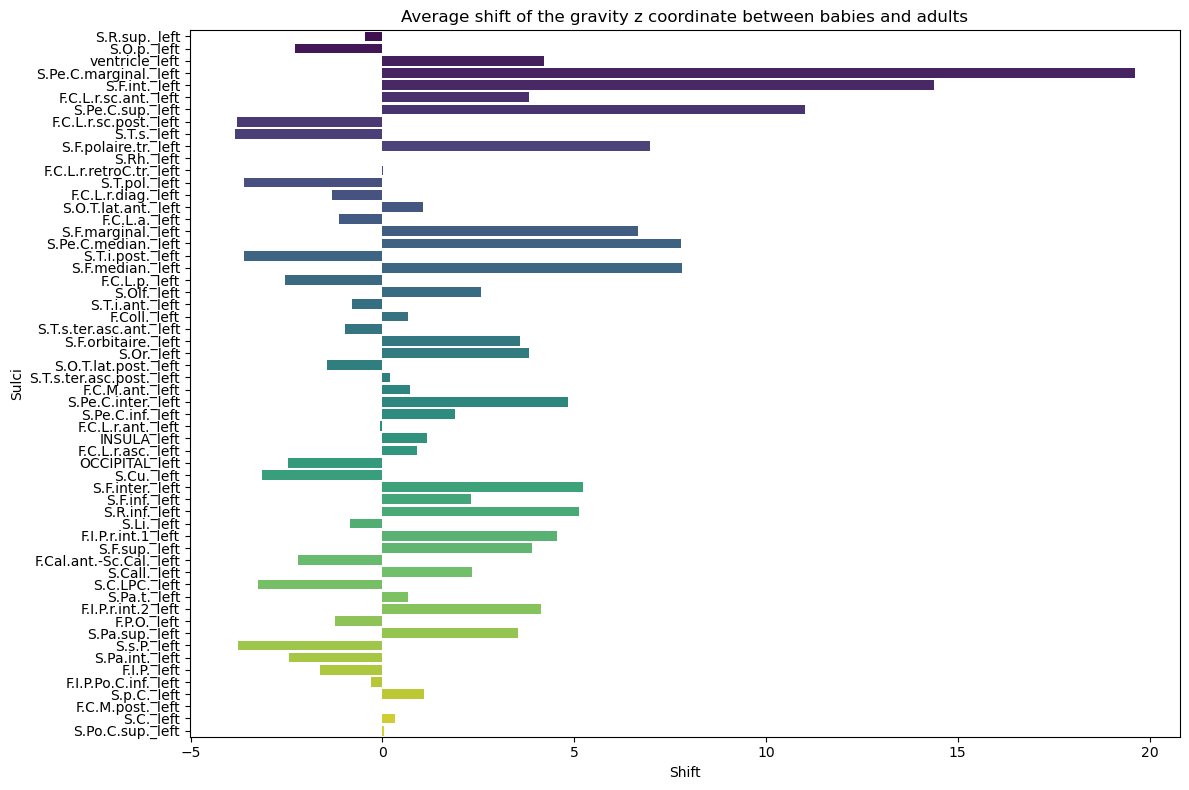

In [30]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/sulci_gravity_center_shifts.csv").sort_values(by="distance", ascending=False)
df_all_shifts_sorted["shift_z"] = -df_all_shifts_sorted["shift_z"]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_all_shifts_sorted, x="shift_z", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity z coordinate between babies and adults")
plt.tight_layout()
plt.show()